### II. Mount Google Drive (Optional)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

### I. Import Required Dependecies


In [4]:
import pandas as pd             # Pandas
import numpy as np              # NumPy
import matplotlib.pyplot as plt # Matplotlib
import seaborn as sns           # Seaborn

# scikit-learn
from sklearn.metrics import confusion_matrix, classification_report

# Keras
import keras
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

### III. Evaluate Model (Test Set)

In [6]:
# Load the trained model
loaded_model = load_model('./models/modelo.h5')

# Set the path to the directory containing the test images
test_data_path = './test_images'

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Create a generator for the test data
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(256, 256),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_generator)

Found 158 images belonging to 3 classes.
10/10 [==============================] - 14s 1s/step - loss: 0.2383 - accuracy: 0.9177


**Display DataFrame**

In [7]:
# Convert accuracy to percentage
test_accuracy_percentage = test_accuracy * 100

# Create a Pandas DataFrame to display the result
evaluation_result = pd.DataFrame({
    'Set': ['Test'],
    'Loss': [test_loss],
    'Accuracy': [f'{test_accuracy_percentage:.2f}%']
})

# Display the evaluation result DataFrame
evaluation_result

,Set,Loss,Accuracy
0,Test,0.238301,91.77%


**Display Confusion Matrix**

10/10 [==============================] - 14s 1s/step


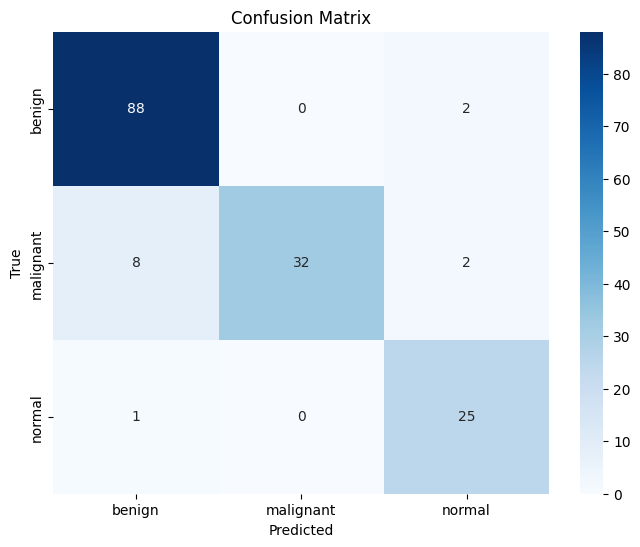

              precision    recall  f1-score   support

      benign       0.91      0.98      0.94        90
   malignant       1.00      0.76      0.86        42
      normal       0.86      0.96      0.91        26

    accuracy                           0.92       158
   macro avg       0.92      0.90      0.91       158
weighted avg       0.92      0.92      0.92       158



In [8]:
# Define class names
class_names = ['benign', 'malignant', 'normal']

# Generate predictions for the test set
predictions = loaded_model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_generator.classes

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(class_report)

**Display Model's Overall Accuracy**

In [9]:
# Display the overall accuracy
print(f"Overall Accuracy: {test_accuracy_percentage:.2f}%")

Overall Accuracy: 91.77%


### IV. Make Predictions (Classify Images)

In [ ]:
# Load the trained model from the checkpoint file
loaded_model = keras.models.load_model('./models/model_complete.h5')

# Define a list of image paths you want to classify
image_paths = [
    './test_images/malignant/malignant (46).png',
    './test_images/normal/normal (91).png',
    './test_images/benign/benign (78).png',
    './test_images/malignant/malignant (30).png',
    './test_images/benign/benign (166).png',
    './test_images/normal/normal (122).png',
]

# Initialize a counter for correct predictions
correct_predictions = 0

# Loop through each image path
for image_path in image_paths:
    # Extract the real class from the image path or any other source
    real_class = image_path.split('/')[-2]  # Adjust the split based on your directory structure

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale pixel values to [0, 1]

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Get the predicted class index
    predicted_label_index = np.argmax(predictions)

    # Map the predicted class index to the actual class label (if you have a mapping)
    class_labels = {0: 'benign', 1: 'malignant', 2: 'normal'}  # Update with your actual class labels
    predicted_label = class_labels.get(predicted_label_index, 'Unknown')

    # Check correctness
    correctness = '"Correct"' if real_class == predicted_label.lower() else '"Incorrect"'

    # Display the real class, predicted class, and correctness
    print(f'Real Class: {real_class}')
    print(f'Predicted Class: {predicted_label}')
    print(correctness)
    print()

    # Increment the correct predictions counter
    if correctness == '"Correct"':
        correct_predictions += 1

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels for better visualization
    plt.show()

# Display the overall correctness
print(f'\n {correct_predictions} out of {len(image_paths)} images are classified correctly.')

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'